## Feladatok:
1. Adatbeolvasás:  
1.1 Olvasd be az adatot egy dataframe-be, és jelenítsed meg az első 5 sorát.        
  
2. Adat műveletek:   
2.1 Töröld az következő oszlopokat: ColourExtInt, CylindersinEngine, Title  
2.2 Nézde meg hogy oszloponként hány hiányzó adat van a dataframe-ben.   
2.3 A Location oszlop hiányzó adatait töltsed fel "Unknown" értékkel.    
2.4 Töröld azokat a sorokat ahol bármelyik adat hiányzik.   
2.5 Néhány mondatban írd le, hogy a törlésen kívül milyen más módszereket lehet használni a hiányzó adatok kezelésére.    
2.6 Készíts egy új oszlopot Age néven. A Year oszlop segítségével számold ki az autók korát. (2023-ból vond ki az értékeket)     
2.7 Töröld a Year oszlopot.
  
3. Adat vizualizáció:  
3.1 Jelenítsd meg, hány darab autó van az egyes Age kategóriákban . Az X tengelyen szerepeljen az Age, Y tengelyen pedig az autók mennyisége.   
3.2 Jelenítsd meg egy kör diagramon, hogy milyen arányban vannak használt és új autók az adatok között. Használd a UsedOrNew oszlopot. A diagramhoz készíts magyarázatot, melyik szelet melyik és szerepeljen rajta a százalék is.   

4. Modell tanítás:  
4.1 Konvertáld szám értékekké azon oszlopok érétkeit ahol jelenleg szöveges adat van.   
4.2 Készíts egy X és egy y változót. X-ben szerepeljenek az autókhoz tartózó feature-ok, y-ban pedig a hozzájuk tartozó ár.   
4.3 Bontsd fel az adathalmazt tanító és teszt részhalmazra. Az adatok 80%-a legyen tanító adat, 20%-a pedig teszt.  
4.4 Taníts fel egy random forest-et. Használd hozzá a következő import-ot: 'from sklearn.ensemble import RandomForestRegressor'     
4.5 A RF kívül még milyen más modelt lehetett volna használni? Hogyan kellett volna módosítani az adathalmazunkat?  
 
5. Értékelés:   
5.1 Értékeld a modelled teljesítményét és pontosságát.  
5.2 Milyen lépéseket lehetne még megtenni a jobb pontosság elérése érdekében?

6. Extra feladat:
6.1 Random keresés segítségével próbálj meg javítani az elért pontosságon. Jelenítsed meg melyek lettek a legjobb parméterek és mennyivel jobb eredményt sikerült ezekkel elérni.

In [21]:
#imports
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# 1. feladat
### 1.1 feladat:

In [22]:
# 1.1 Adatbeolvasás
df = pd.read_csv("vehicle_prices.csv")

# Megjelenítjük az első 5 sort
print(df.head())

           Brand    Year   Model               Car/Suv  \
0      Ssangyong  2022.0  Rexton  Sutherland Isuzu Ute   
1             MG  2022.0     MG3             Hatchback   
2            BMW  2022.0    430I                 Coupe   
3  Mercedes-Benz  2011.0    E500                 Coupe   
4        Renault  2022.0  Arkana                   SUV   

                                       Title UsedOrNew Transmission  \
0       2022 Ssangyong Rexton Ultimate (awd)      DEMO    Automatic   
1  2022 MG MG3 Auto Excite (with Navigation)      USED    Automatic   
2                      2022 BMW 430I M Sport      USED    Automatic   
3           2011 Mercedes-Benz E500 Elegance      USED    Automatic   
4                 2022 Renault Arkana Intens      USED    Automatic   

         Engine DriveType  FuelType FuelConsumption Kilometres   ColourExtInt  \
0  4 cyl, 2.2 L       AWD    Diesel  8.7 L / 100 km       5595  White / Black   
1  4 cyl, 1.5 L     Front   Premium  6.7 L / 100 km         16

# 2. feladat
### 2.1 feladat:

In [23]:
#2.1 Töröld az következő oszlopokat: ColourExtInt, CylindersinEngine, Title  
df.drop(columns=["ColourExtInt", "CylindersinEngine", "Title"], inplace=True)
print(df.head())

           Brand    Year   Model               Car/Suv UsedOrNew Transmission  \
0      Ssangyong  2022.0  Rexton  Sutherland Isuzu Ute      DEMO    Automatic   
1             MG  2022.0     MG3             Hatchback      USED    Automatic   
2            BMW  2022.0    430I                 Coupe      USED    Automatic   
3  Mercedes-Benz  2011.0    E500                 Coupe      USED    Automatic   
4        Renault  2022.0  Arkana                   SUV      USED    Automatic   

         Engine DriveType  FuelType FuelConsumption Kilometres  \
0  4 cyl, 2.2 L       AWD    Diesel  8.7 L / 100 km       5595   
1  4 cyl, 1.5 L     Front   Premium  6.7 L / 100 km         16   
2    4 cyl, 2 L      Rear   Premium  6.6 L / 100 km       8472   
3  8 cyl, 5.5 L      Rear   Premium   11 L / 100 km     136517   
4  4 cyl, 1.3 L     Front  Unleaded    6 L / 100 km       1035   

            Location   BodyType     Doors     Seats   Price  
0     Caringbah, NSW        SUV   4 Doors   7 Seats   

### 2.2 feladat:

In [24]:
#2.2 Nézde meg hogy oszloponként hány hiányzó adat van a dataframe-ben.   
missing_data = df.isnull().sum()
print(missing_data)

Brand                 1
Year                  1
Model                 1
Car/Suv              28
UsedOrNew             1
Transmission          1
Engine                1
DriveType             1
FuelType              1
FuelConsumption       1
Kilometres            1
Location            450
BodyType            282
Doors              1604
Seats              1705
Price                 3
dtype: int64


### 2.3 feladat:

In [39]:
#2.3 A Location oszlop hiányzó adatait töltsed fel "Unknown" értékkel.    
df["Location"] = df["Location"].fillna("Unknown")

### 2.4 feladat:

In [26]:
#2.4 Töröld azokat a sorokat ahol bármelyik adat hiányzik.   
df.dropna(inplace=True)

### 2.5 feladat:
2.5 Néhány mondatban írd le, hogy a törlésen kívül milyen más módszereket lehet használni a hiányzó adatok kezelésére.  2p  
Adatimputáció: Az adatimputáció során a hiányzó értékeket más adatok alapján becsülhetjük meg. Például, numerikus adatok esetén az átlagos vagy medián értékkel helyettesíthetjük a hiányzó értékeket. Kategorikus változók esetén gyakran a leggyakoribb értéket használjuk a hiányzó értékek pótlására.
Interpoláció: Az interpoláció során a hiányzó adatokat az ismert adatok közötti mintázatok alapján becsülhetjük meg. Ez különösen hasznos időben vagy térben változó adatok esetén.
Statisztikai módszerek: A hiányzó adatok becslésére számos statisztikai módszer létezik, amelyek figyelembe veszik az adatok eloszlását és tulajdonságait.
Gyengén tanított modellek: A hiányzó adatok becslésére olyan gépi tanulási modelleket is használhatunk, amelyek képesek kezelni a hiányzó adatokat, például a döntési fákat vagy a K-nearest neighbors (KNN) algoritmust.

### 2.6 feladat:

In [27]:
#2.6 Készíts egy új oszlopot Age néven. A Year oszlop segítségével számold ki az autók korát. (2023-ból vond ki az értékeket)     
df['Age'] = 2023 - df['Year']

### 2.7 feladat:

In [28]:
#2.7 Töröld a Year oszlopot.
df.drop(columns=['Year'], inplace=True)

# 3. feladat
### 3.1 feladat

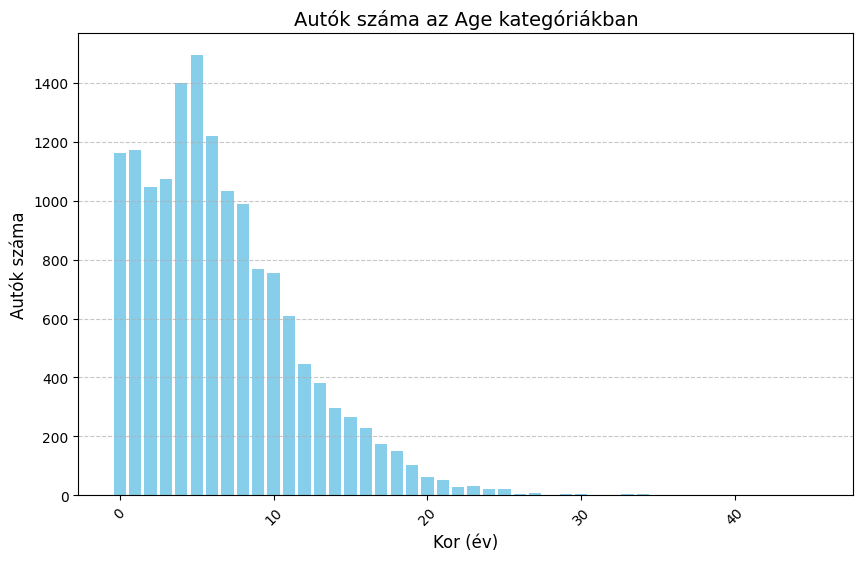

In [29]:
#3.1 Jelenítsd meg, hány darab autó van az egyes Age kategóriákban . Az X tengelyen szerepeljen az Age, Y tengelyen pedig az autók mennyisége.   
import matplotlib.pyplot as plt

car_counts = df['Age'].value_counts()

# Diagram kirajzolása
plt.figure(figsize=(10, 6))
plt.bar(car_counts.index, car_counts.values, color='skyblue')
plt.xlabel('Kor (év)', fontsize=12)
plt.ylabel('Autók száma', fontsize=12)
plt.title('Autók száma az Age kategóriákban', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



### 3.2 feladat

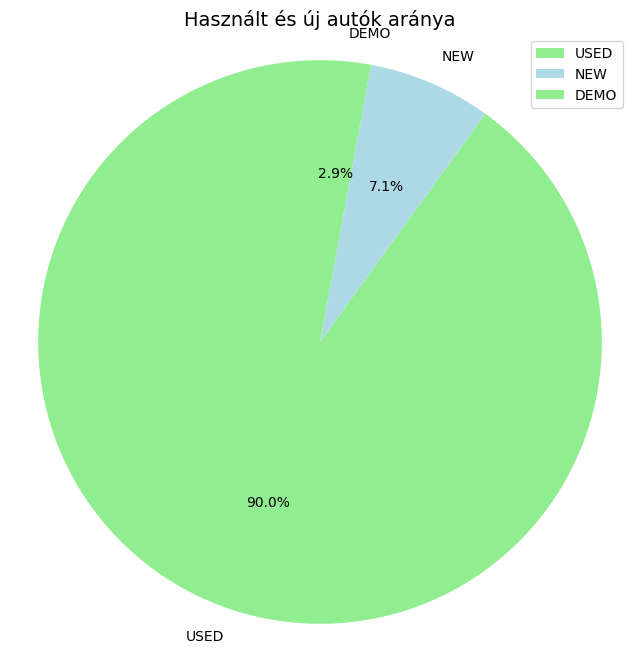

In [30]:
#3.2 Jelenítsd meg egy kör diagramon, hogy milyen arányban vannak használt és új autók az adatok között. Használd a UsedOrNew oszlopot. A diagramhoz készíts magyarázatot, melyik szelet melyik és szerepeljen rajta a százalék is.  
used_new_counts = df['UsedOrNew'].value_counts()

# Kör diagram létrehozása
plt.figure(figsize=(8, 8))
plt.pie(used_new_counts, labels=used_new_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightblue'], startangle=90)
plt.title('Használt és új autók aránya', fontsize=14)
plt.axis('equal')  # Az egyenlő tengelyek érdekében
plt.legend(loc='upper right')  # Jelmagyarázat
plt.show()

# 4. feladat
### 4.1 feladat

In [31]:
#4.1 Konvertáld szám értékekké azon oszlopok érétkeit ahol jelenleg szöveges adat van.   
numeric_columns = ["Price", 'Engine', 'Kilometres']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

### 4.2 feladat

In [32]:
#4.2 Készíts egy X és egy y változót. X-ben szerepeljenek az autókhoz tartózó feature-ok, y-ban pedig a hozzájuk tartozó ár.    
X = df.drop(columns=['Price'])

y = df['Price']

### 4.3 feladat

In [33]:
#4.3 Bontsd fel az adathalmazt tanító és teszt részhalmazra. Az adatok 80%-a legyen tanító adat, 20%-a pedig teszt.   
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tanító adatok mérete:", X_train.shape)
print("Teszt adatok mérete:", X_test.shape)

Tanító adatok mérete: (12012, 15)
Teszt adatok mérete: (3003, 15)


### 4.4 feladat

In [34]:
print(y[y.isnull()])
# Az árak mediánjának kiszámítása
median_price = y.median()

# Az NaN értékek kitöltése az árak mediánjával
y.fillna(median_price, inplace=True)

# Ellenőrizd újra, hogy nincsenek-e NaN értékek az y változóban
print(y.isnull().sum())


15322   NaN
15397   NaN
15662   NaN
15686   NaN
15695   NaN
15782   NaN
15787   NaN
15816   NaN
15909   NaN
16012   NaN
16153   NaN
16156   NaN
16245   NaN
16252   NaN
16278   NaN
16300   NaN
16307   NaN
16310   NaN
16313   NaN
16314   NaN
16330   NaN
16347   NaN
16353   NaN
16366   NaN
16379   NaN
16399   NaN
16412   NaN
16424   NaN
16425   NaN
16432   NaN
16436   NaN
16478   NaN
16482   NaN
16597   NaN
16643   NaN
Name: Price, dtype: float64
0


In [35]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Adatok betöltése vagy meghatározása itt (df)

# X és y változók létrehozása
X = df.drop("Price", axis=1)  # Az X változó tartalmazza az összes funkciót, kivéve az árat
y = df["Price"]

# Távolítsd el a NaN értékeket tartalmazó sorokat az X és y változókból
nan_indices = y[y.isnull()].index
if not nan_indices.empty:
    X = X.drop(nan_indices)
    y = y.drop(nan_indices)

# Kategorikus oszlopok átalakítása dummy változókká
categorical_columns = X.select_dtypes(include=["object"]).columns
X = pd.get_dummies(X, columns=categorical_columns)

# Random Forest regresszor létrehozása és tanítása
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X, y)



RandomForestRegressor(random_state=42)

### 4.5 feladat
4.5 A RF kívül még milyen más modelt lehetett volna használni? Hogyan kellett volna módosítani az adathalmazunkat?
    
Lineáris regresszió: A lineáris regresszió egyszerű modell, amely lineáris összefüggéseket keres az előrejelzett változók és a célváltozó között. Ehhez az adathalmazhoz módosítani kellett volna a kategorikus változókat, például az autómárkát és az eladási helyet egy numerikus formátumba, például dummy változókká vagy kategóriák kódolásával.
Ridge vagy Lasso regresszió: Ezek a regressziós módszerek a lineáris regressziót bővítik a regularizációval, ami segít az overfitting problémájának kezelésében. Az adathalmazt előzetesen ki kell tisztítani a hiányzó értékektől, és az egyes változókat kódolni kell a modellezéshez.
Gradient Boosting regresszió: Ez egy olyan összetett modell, amely a gyenge regressziós modellek (általában döntési fák) sorozatát használja, és ezeket iteratív módon javítja. Az adathalmaz előkészítése hasonló lenne, mint a RandomForestRegressor esetében.
Support Vector Machine (SVM) regresszió: Az SVM egy olyan modell, amely megpróbálja megtalálni azt a hiper síkot, amely a legnagyobb távolságra van a két osztály között a bemeneti adatok között. Az SVM alkalmazása során az adathalmazt előzetesen normalizálni kell, és a kategorikus változókat is megfelelő módon kell kezelni.

# 5. feladat
### 5.1 feladat

#5.1 Értékeld a modelled teljesítményét és pontosságát.     
Mean Absolute Error (MAE): Az abszolút értékek átlagát veszi a becsült értékek és a valós értékek között. Az MAE kifejezi, hogy átlagosan mennyivel tér el a modell becslése a valós értéktől.
Mean Squared Error (MSE): Az MSE az átlagos négyzetes eltérést mutatja a becsült értékek és a valós értékek között. Az MSE a kisebb eltéréseket nagyobb súllyal kezeli, mint az MAE.
Root Mean Squared Error (RMSE): Az RMSE az MSE négyzetgyöke, így az eredmény az eredeti mértékegységben van, ami jobban interpretálható.
R-squared (R^2): Az R^2 azt mutatja, hogy mennyire magyarázza el a modell a célváltozó változékonyságának arányát. Az értéke 0 és 1 között van, ahol 1 azt jelenti, hogy a modell tökéletesen magyarázza el a változékonyságot, és 0 azt jelenti, hogy a modell semmilyen magyarázó erővel nem rendelkezik.
Adjusted R-squared: Az R^2 korrigált verziója, amely figyelembe veszi a magyarázó változók számát és a mintaszámot.

### 5.2 feladat
5.2 Milyen lépéseket lehetne még megtenni a jobb pontosság elérése érdekében? 3p

Feature Engineering: Lehetséges, hogy néhány új jellemző hozzáadása vagy a meglévő jellemzők módosítása javíthatja a modell teljesítményét. Például, ha vannak olyan jellemzők, amelyek között korreláció van, vagy olyan csoportosítások, amelyeket a modell nem értelmez, akkor ezek az információk beépíthetők az adathalmazba.
Hyperparameter Tuning: A modell paramétereinek finomhangolása gyakran javíthatja a modell teljesítményét. Például a random forest esetében a fák száma, a fa mélysége, a megosztások számának korlátozása és más hiperparaméterek beállítása lehet hatékony.
Algoritmusváltás: Más gépi tanulási algoritmusokat is kipróbálhatunk, mint például Gradient Boosting, Support Vector Machines vagy Neural Networks. Egyes esetekben ezek az algoritmusok jobban teljesíthetnek, mint a random forest.
Feature Selection: Ha sok jellemző van az adathalmazban, a fontos és releváns jellemzők kiválasztása segíthet az overfitting csökkentésében és a modell pontosságának növelésében.
Adathalmaz bővítése: További adatok hozzáadása az adathalmazhoz általában segít a modellek általánosításában és pontosságának növelésében.
Cross-Validation: A cross-validation alkalmazása segíthet abban, hogy a modellünk reprezentatívabb eredményeket adjon a tanuló és teszt adatok közötti általánosítás tekintetében.

# 6. feladat
### 6.1 feladat

In [38]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Adatok felosztása tanító és teszt adathalmazra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ha vannak NaN értékek az y változóban, távolítsd el azokat az indexeket az X és y változókból
nan_indices = y_train[y_train.isnull()].index
if not nan_indices.empty:
    X_train = X_train.drop(nan_indices)
    y_train = y_train.drop(nan_indices)

# Definiáljuk a hiperparaméterek tartományát
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_features': ['sqrt', 'log2'],  # Az 'auto' eltávolítva
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Random Search létrehozása
rf_random = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                               param_distributions=param_grid,
                               n_iter=50,  # Iterációk számának csökkentése
                               cv=3, verbose=2, random_state=42, n_jobs=-1)

# Random Search futtatása a modellünkön
rf_random.fit(X_train, y_train)

# A legjobb paraméterek kinyomtatása
print("A legjobb paraméterek:", rf_random.best_params_)

# A legjobb pontosság kinyomtatása
print("A legjobb keresztvalidációs pontosság:", rf_random.best_score_)

# Legjobb modell értékelése a teszt adathalmazon
best_model = rf_random.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("RMSE a teszt adathalmazon a legjobb modellel:", rmse)



Fitting 3 folds for each of 50 candidates, totalling 150 fits
A legjobb paraméterek: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
A legjobb keresztvalidációs pontosság: 0.7133596950279465
RMSE a teszt adathalmazon a legjobb modellel: 16483.79667746638
